<a href="https://colab.research.google.com/github/djuarez7-KSU/STAT-7220-Applied-Experimental-Design/blob/Personal-Notes/introduction_to_completely_randomized_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "djuarez7-KSU"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
       print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/djuarez7-KSU/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/djuarez7-KSU/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments


In [17]:
import random
import numpy as np

#set seed for reproducability
random.seed(123)

#specify can number
balls  = list(range(1,61)) #remember python starts at 0 not 1

#take a random sample of the cans for plastic
formula1 = random.sample(balls, 30)

#the elements from cans not in plastic
#will be assigned to steel
formula2 = [i for i in balls if i not in formula1]

#sort both list in ascending order
formula1.sort()
formula2.sort()

#combine the list and print
combined = np.column_stack((formula1, formula2))
print(combined)


[[ 1  2]
 [ 3  8]
 [ 4 10]
 [ 5 12]
 [ 6 13]
 [ 7 14]
 [ 9 15]
 [11 17]
 [16 19]
 [18 20]
 [21 23]
 [22 24]
 [25 26]
 [27 30]
 [28 31]
 [29 32]
 [35 33]
 [36 34]
 [39 37]
 [44 38]
 [46 40]
 [47 41]
 [48 42]
 [49 43]
 [50 45]
 [52 51]
 [57 53]
 [58 54]
 [59 55]
 [60 56]]


In [19]:
#install openpyxl to read excel files
%pip install openpyxl

#import Pandas
import pandas as pd

#import can temperature file
balls_df = pd.read_excel("Dog Toys.xlsx")
print(balls_df.info())

#group the dataframe by the "Treatment"
#column and calculate mean/sd for the
#"temperature" colum

summary_stats = balls_df.groupby("Formulation")["PSI"].agg(["mean", "std"])
print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Formulation  120 non-null    object 
 1   PSI          120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None
                   mean        std
Formulation                       
Formula 1    278.432167  12.450986
Formula 2    291.924333  16.644723


Text(0, 0.5, 'PSI')

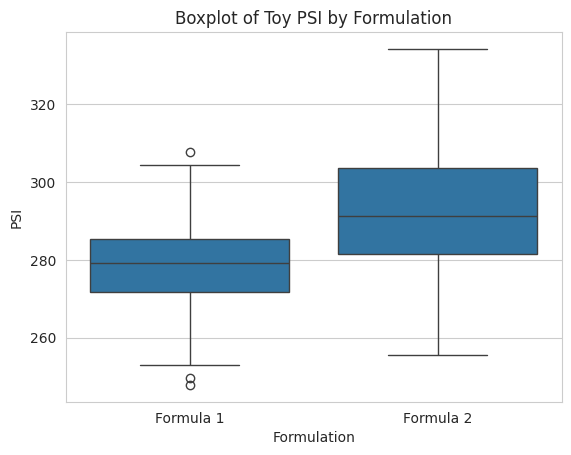

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#set a nice minimal style for plot
sns.set_style("whitegrid")

#create a boxplot using seaborn
sns.boxplot(x = "Formulation", y ="PSI", data= balls_df)

#add title and labels using matplotlib
plt.title("Boxplot of Toy PSI by Formulation")
plt.xlabel("Formulation")
plt.ylabel("PSI")



In [21]:
mu_hat = balls_df["PSI"].mean()

## Calculate the group means of Temperature, grouped by Treatment ##

group_means = balls_df.groupby('Formulation')['PSI'].mean().reset_index()
group_means = group_means.rename(columns={'PSI': 'mean_psi'})

## Calculate the difference between group means and the grand mean ##

tau_hat = group_means['mean_psi'] - mu_hat

## Print Results ##

print("Grand Mean:", mu_hat)
print("\nGroup Means:")
print(group_means)
print("\nTau Hats:")
print(tau_hat)

Grand Mean: 285.17825

Group Means:
  Formulation    mean_psi
0   Formula 1  278.432167
1   Formula 2  291.924333

Tau Hats:
0   -6.746083
1    6.746083
Name: mean_psi, dtype: float64


In [22]:
## Install statsmodels.api ##
#%pip install statsmodels

## Import statsmodels ##

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

mod = ols("PSI ~ Formulation", data=balls_df).fit()

## Get the ANOVA table ##

aov_tab = sm.stats.anova_lm(mod,typ=1)

print(aov_tab)

                df        sum_sq      mean_sq          F    PR(>F)
Formulation    1.0   5461.156841  5461.156841  25.278813  0.000002
Residual     118.0  25492.356292   216.036918        NaN       NaN
